In [ ]:
"""Installations pour faire des cartes"""
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install geopandas
!pip install topojson

In [14]:
"""Librairies nécessaires"""
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [6]:
"""Commandes (optionnelles) dans le terminal:

import os

remarques sur github, commandes du terminal :
- ls : lister 
- cd : change directory 
    cd projet-stat-app-2A

vérifier le cwd :
os.getcwd()

"""

In [ ]:
"""Installation de cartiflette dans le terminal"""

!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a


In [22]:
"""Installation de cartiflette"""
from cartiflette.s3 import download_vectorfile_url_all

In [129]:
"""Données administratives de paris intra muros"""
paris_intra_muros = download_vectorfile_url_all(
    crs = 4326,
    values = ["75"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 18.1MiB/s]


In [130]:
def carte_prix_moyen_arrodissement(emplacement):

    #lecture du fichier
    df = pd.read_csv(emplacement)

    #conversion du fichier en geopanda
    df_geo = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="WGS84"
        )

    #on ajoute à chaque appartement les données administratives de son arrondissement
    df_geo = gpd.sjoin(df_geo, paris_intra_muros, predicate = 'within')

    #regroupement selon les arrondissements et prix moyen au m2
    df_geo_group = (df_geo
      .groupby("INSEE_COG")
      .agg({"prix_au_m2_réel": "mean"})
      .reset_index())

    #on ajoute aux données administratives les prix moyens
    paris_intra_muros_count = paris_intra_muros.merge(
        df_geo_group
    ).to_crs(2154)

    #affichage de la carte
    paris_intra_muros_count.plot(
    column = "prix_au_m2_réel", cmap="coolwarm", legend=True
    )

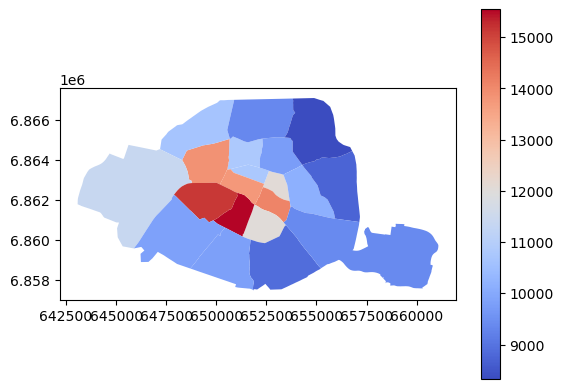

In [135]:
"""Test de la fonction"""
emplacement = "Données_clean/DVF_75_2023_clean.csv"
carte_prix_moyen_arrodissement(emplacement)